In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.dropna(inplace = True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Data Visualization & Exploration

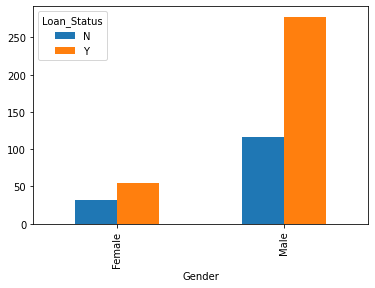

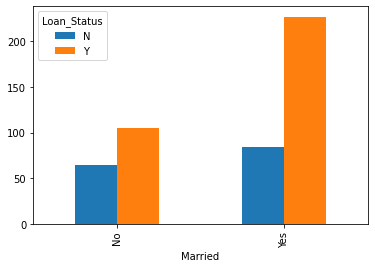

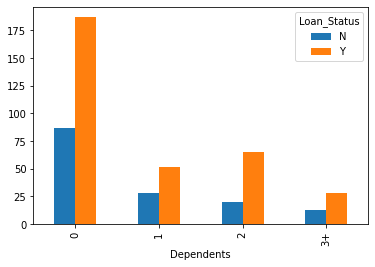

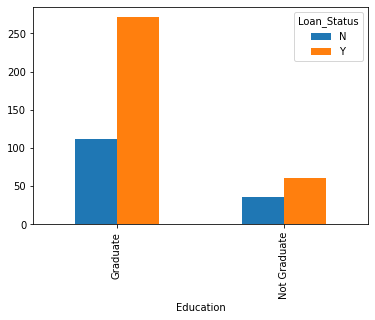

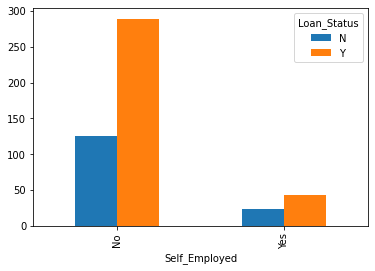

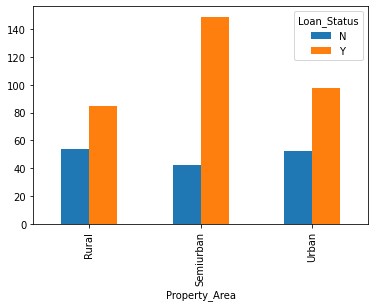

In [7]:
pd.crosstab(df.Gender, df.Loan_Status).plot(kind = 'bar')
pd.crosstab(df.Married, df.Loan_Status).plot(kind = 'bar')
pd.crosstab(df.Dependents, df.Loan_Status).plot(kind = 'bar')
pd.crosstab(df.Education, df.Loan_Status).plot(kind = 'bar')
pd.crosstab(df.Self_Employed, df.Loan_Status).plot(kind = 'bar')
pd.crosstab(df.Property_Area, df.Loan_Status).plot(kind = 'bar')
plt.show()

* Gender
* Married
* Education
* Self Employed 

In [9]:
df.drop(['Loan_ID', 'Dependents', 'Property_Area'], axis = 1, inplace = True)

In [11]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y


In [12]:
df['Sex'] = df['Gender'].apply(lambda x: 1 if x =='Male' else 0)

In [14]:
df['Married?'] = df['Married'].apply(lambda x: 1 if x =='Yes' else 0)
df['Graduate'] = df['Education'].apply(lambda x: 1 if x =='Graduate' else 0)
df['Self Employed'] = df['Self_Employed'].apply(lambda x: 1 if x =='Yes' else 0)
df.drop(['Gender', 'Married', 'Education', 'Self_Employed'], axis = 1, inplace = True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Sex,Married?,Graduate,Self Employed
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,1,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0
4,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,0,0,1,0
610,4106,0.0,40.0,180.0,1.0,Y,1,1,1,0
611,8072,240.0,253.0,360.0,1.0,Y,1,1,1,0
612,7583,0.0,187.0,360.0,1.0,Y,1,1,1,0


In [18]:
xx = df[['Sex', 'Married?', 'Graduate', 'Self Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
xx.head()

,Sex,Married?,Graduate,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0
4,1,0,1,0,6000,0.0,141.0,360.0,1.0
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0


In [20]:
df['Loan'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
yy = df.Loan
yy

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan, Length: 480, dtype: int64

## Model Creation

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3)

In [29]:
x_train

,Sex,Married?,Graduate,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
581,1,0,1,0,1836,33837.0,90.0,360.0,1.0
488,1,1,1,1,4583,2083.0,160.0,360.0,1.0
276,1,1,1,0,3993,3274.0,207.0,360.0,1.0
183,1,1,1,0,33846,0.0,260.0,360.0,1.0
532,1,0,1,0,3588,0.0,110.0,360.0,0.0
...,...,...,...,...,...,...,...,...,...
354,0,1,1,0,2423,505.0,130.0,360.0,1.0
539,1,1,1,0,6417,0.0,157.0,180.0,1.0
528,1,0,0,0,2679,1302.0,94.0,360.0,1.0
99,1,1,1,0,1759,3541.0,131.0,360.0,1.0


In [30]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/home/charles/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8333333333333334

In [31]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8125

In [32]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.7222222222222222